Peer-graded Assignment: Course Project 1
(Reproducible Research)
Introduction

It is now possible to collect a large amount of data about personal movement using activity monitoring devices such as a Fitbit, Nike Fuelband, or Jawbone Up. These type of devices are part of the “quantified self” movement - a group of enthusiasts who take measurements about themselves regularly to improve their health, to find patterns in their behavior, or because they are tech geeks. But these data remain under-utilized both because the raw data are hard to obtain and there is a lack of statistical methods and software for processing and interpreting the data.

This assignment makes use of data from a personal activity monitoring device. This device collects data at 5 minute intervals through out the day. The data consists of two months of data from an anonymous individual collected during the months of October and November, 2012 and include the number of steps taken in 5 minute intervals each day.

Data
The data for this assignment can be downloaded from the course web site:

Dataset: Activity monitoring data [52K] The variables included in this dataset are:

steps: Number of steps taking in a 5-minute interval (missing values are coded as NA).

date: The date on which the measurement was taken in YYYY-MM-DD format.

interval: Identifier for the 5-minute interval in which measurement was taken.

The dataset is stored in a comma-separated-value (CSV) file and there are a total of 17,568 observations in this dataset.

Loading and preprocessing the data

In [1]:
library(knitr)
library(ggplot2)
library(dplyr)
library(plyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize




Download the file, unzip and read the .csv file.

In [2]:
temp <- tempfile()
download.file("https://d396qusza40orc.cloudfront.net/repdata%2Fdata%2Factivity.zip", temp, mode="wb")
unzip(temp, "activity.csv")
activity <- read.csv("activity.csv",header=T)
unlink(temp)

Calculate the total number of steps taken per day?
(For this part of the assignment, you can ignore the missing values in the dataset.)

In [3]:
totalstepsperday <- aggregate(steps ~ date, data = activity, FUN = sum, na.rm = TRUE)
head(totalstepsperday)

,date,steps
,<fct>,<int>
1,2012-10-02,126
2,2012-10-03,11352
3,2012-10-04,12116
4,2012-10-05,13294
5,2012-10-06,15420
6,2012-10-07,11015


Make a histogram of the total number of steps taken each day. convert dates first

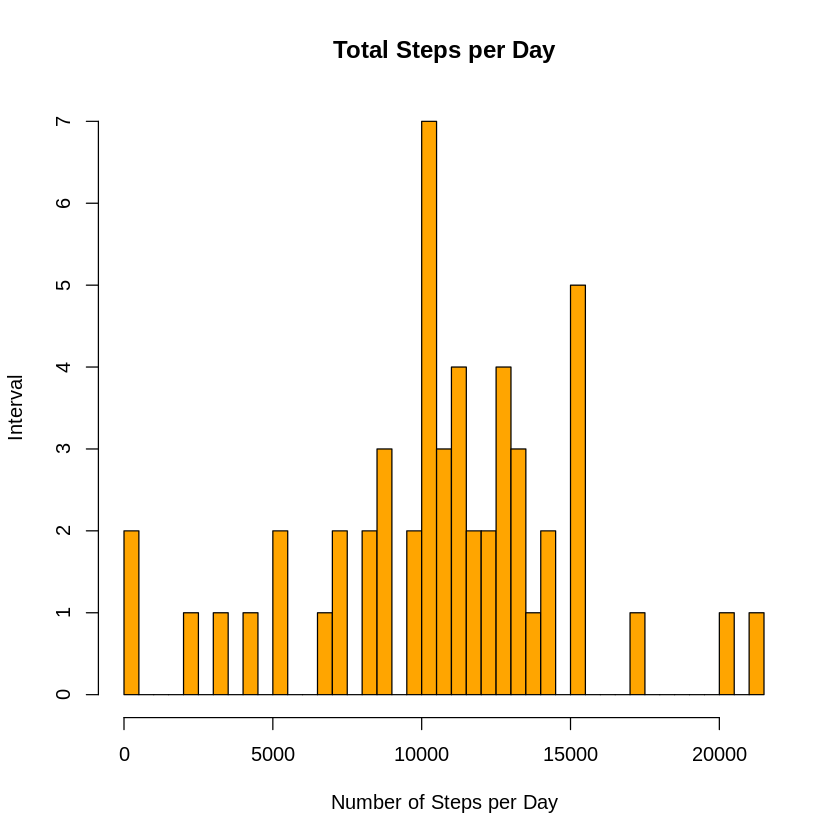

In [4]:
## converting dates to Y-M-D format
activity$date <- as.Date(activity$date, "%Y-%m-%d")
## calculate steps as it relates to date using SUM (per day)
hist(totalstepsperday$steps, 
    main="Total Steps per Day", 
    xlab="Number of Steps per Day", 
    ylab = "Interval",
    col="orange",
    breaks=50)

Calculate and report the mean and median total number of steps taken per day.

In [5]:
## mean of total steps per day
msteps <- mean(totalstepsperday$steps)
msteps

[1] 10766.19

In [6]:
## median of total steps per day
medsteps <- median(totalstepsperday$steps)
medsteps

[1] 10765

In [7]:
## check work using summary
summary(totalstepsperday)

         date        steps      
 2012-10-02: 1   Min.   :   41  
 2012-10-03: 1   1st Qu.: 8841  
 2012-10-04: 1   Median :10765  
 2012-10-05: 1   Mean   :10766  
 2012-10-06: 1   3rd Qu.:13294  
 2012-10-07: 1   Max.   :21194  
 (Other)   :47                  

What is the average daily activity pattern?
Make a time series plot (i.e. type = “l”) of the 5-minute interval (x-axis) and the average number of steps taken, averaged across all days (y-axis)

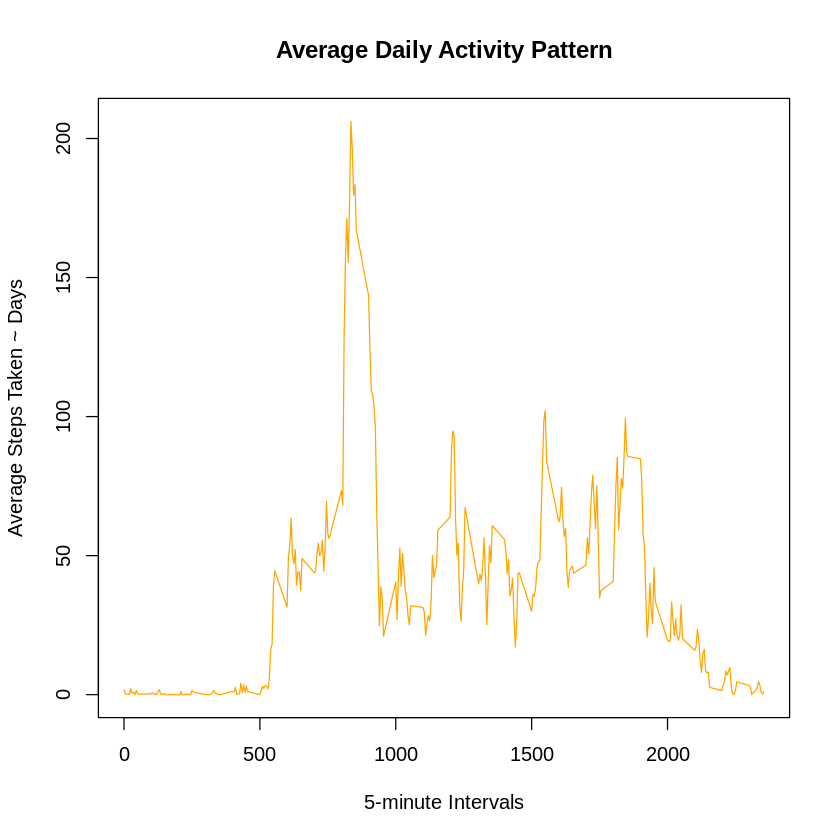

In [8]:
## five minute average using steps to interval - FUN = mean instead of sum
fivemin <- aggregate(steps ~ interval, data = activity, FUN = mean, na.rm = TRUE)
## line chart
plot(x = fivemin$interval, 
    y = fivemin$steps, 
    type = "l", 
    col = "orange",
    xlab = "5-minute Intervals",
    ylab = "Average Steps Taken ~ Days",
    main = "Average Daily Activity Pattern")

Which 5-minute interval, on average across all the days in the dataset, contains the maximum number of steps?

In [9]:
maxsteps <- fivemin$interval[which.max(fivemin$steps)]
maxsteps

[1] 835

Imputing missing values
Note that there are a number of days/intervals where there are missing values (coded as NA). The presence of missing days may introduce bias into some calculations or summaries of the data.

Calculate and report the total number of missing values in the dataset (i.e. the total number of rows with NAs)
Devise a strategy for filling in all of the missing values in the dataset. The strategy does not need to be sophisticated. For example, you could use the mean/median for that day, or the mean for that 5-minute interval, etc.

Replace NA values with the mean results for five minute intervals Create a new dataset that is equal to the original dataset but with the missing data filled in.

In [10]:
activity2 <- activity
nas <- is.na(activity2$steps)
avg_interval <- tapply(activity2$steps, activity2$interval, mean, na.rm=TRUE, simplify = TRUE)
activity2$steps[nas] <- avg_interval[as.character(activity2$interval[nas])]
names(activity2)

[1] "steps"    "date"     "interval"

In [11]:
## Check for no-NA
sum(is.na(activity2))

[1] 0

Make a histogram of the total number of steps taken each day and Calculate and report the mean and median total number of steps taken per day. Do these values differ from the estimates from the first part of the assignment? What is the impact of imputing missing data on the estimates of the total daily number of steps?


In [12]:
#Plotting
#Setting up the pannel for one row and two columns
par(mfrow=c(1,2))

In [13]:
## Similar analysis without NAs now
totalstepsperday2 <- aggregate(steps ~ date, data = activity2, FUN = sum, na.rm = TRUE)
head(totalstepsperday2)

,date,steps
,<date>,<dbl>
1,2012-10-01,10766.19
2,2012-10-02,126.00
3,2012-10-03,11352.00
4,2012-10-04,12116.00
5,2012-10-05,13294.00
6,2012-10-06,15420.00


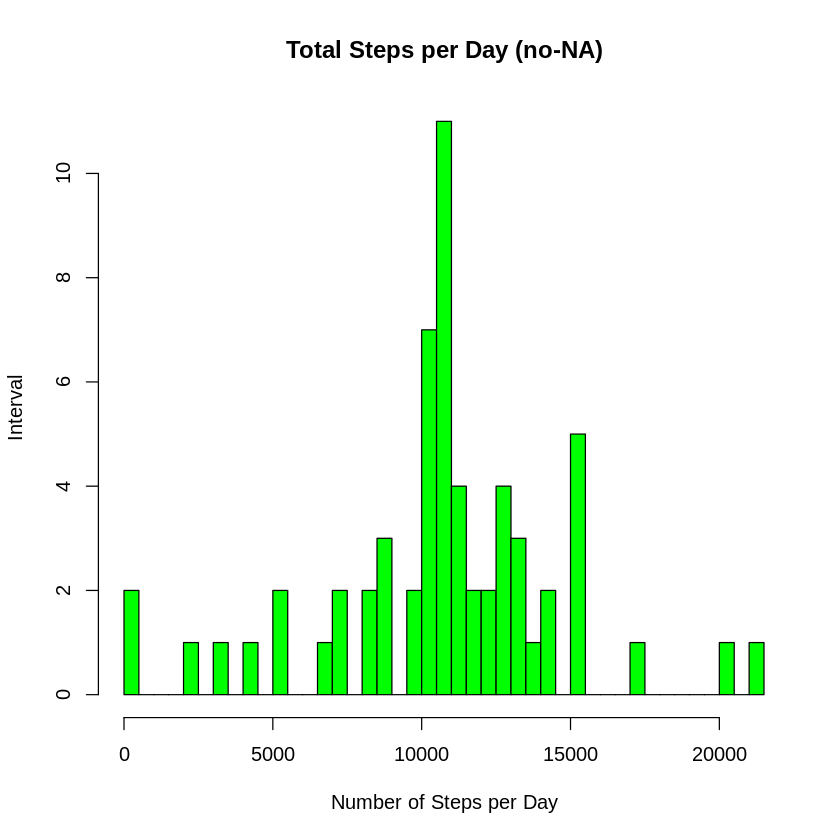

In [14]:
## Histogram without the NA values
hist(totalstepsperday2$steps, 
    main = "Total Steps per Day (no-NA)", 
    xlab = "Number of Steps per Day", 
    ylab = "Interval",
    col="green",
    breaks=50)

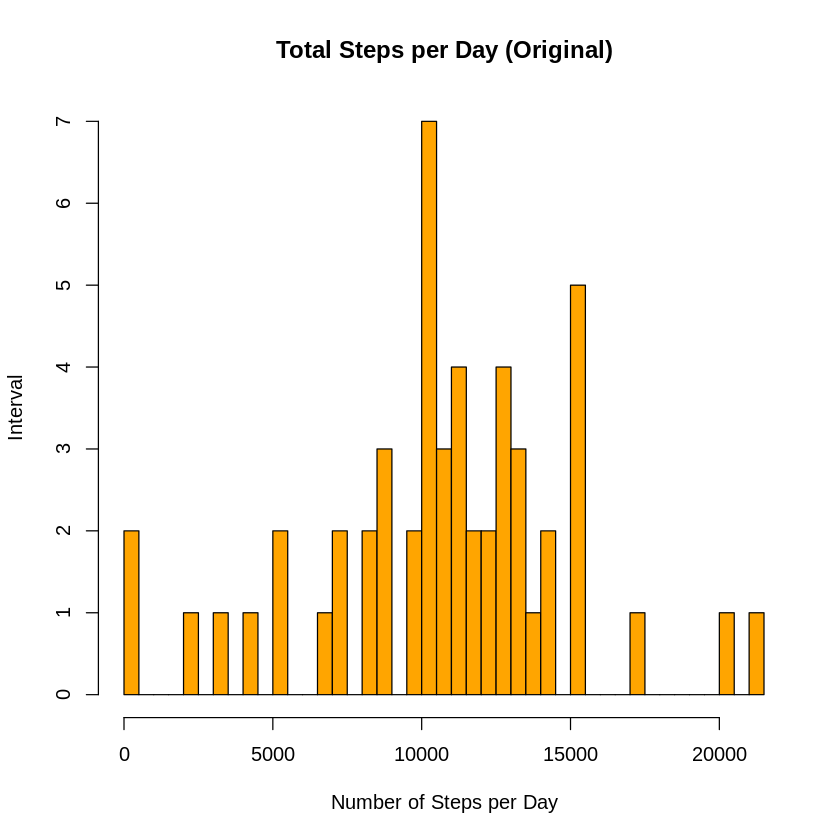

In [15]:
##Histogram with the orginal dataset
hist(totalstepsperday$steps, 
    main="Total Steps per Day (Original)", 
    xlab="Number of Steps per Day", 
    ylab = "Interval",
    col="orange",
    breaks=50)


In [16]:
## Reset panel
par(mfrow=c(1,1))

In [17]:
## What is the impact of imputing data?
summary(totalstepsperday)
summary(totalstepsperday2)
## Mean and median values are almost identical, but the quantiles are significantly different.

         date        steps      
 2012-10-02: 1   Min.   :   41  
 2012-10-03: 1   1st Qu.: 8841  
 2012-10-04: 1   Median :10765  
 2012-10-05: 1   Mean   :10766  
 2012-10-06: 1   3rd Qu.:13294  
 2012-10-07: 1   Max.   :21194  
 (Other)   :47                  

      date                steps      
 Min.   :2012-10-01   Min.   :   41  
 1st Qu.:2012-10-16   1st Qu.: 9819  
 Median :2012-10-31   Median :10766  
 Mean   :2012-10-31   Mean   :10766  
 3rd Qu.:2012-11-15   3rd Qu.:12811  
 Max.   :2012-11-30   Max.   :21194  

Are there differences in activity patterns between weekdays and weekends? For this part the weekdays() function may be of some help here. Use the dataset with the filled-in missing values for this part.

In [18]:
## Data has three fields, and we will add a new one in the next step
head(activity2)

,steps,date,interval
,<dbl>,<date>,<int>
1,1.7169811,2012-10-01,0
2,0.3396226,2012-10-01,5
3,0.1320755,2012-10-01,10
4,0.1509434,2012-10-01,15
5,0.0754717,2012-10-01,20
6,2.0943396,2012-10-01,25


Create a new factor variable in the dataset with two levels - “weekday” and “weekend” indicating whether a given date is a weekday or weekend day.

In [19]:
## Add the new weekend/weekday field
activity2<- activity2%>%
        mutate(typeofday= ifelse(weekdays(activity2$date)=="Saturday" | weekdays(activity2$date)=="Sunday", "Weekend", "Weekday"))
head(activity2)

,steps,date,interval,typeofday
,<dbl>,<date>,<int>,<chr>
1,1.7169811,2012-10-01,0,Weekday
2,0.3396226,2012-10-01,5,Weekday
3,0.1320755,2012-10-01,10,Weekday
4,0.1509434,2012-10-01,15,Weekday
5,0.0754717,2012-10-01,20,Weekday
6,2.0943396,2012-10-01,25,Weekday


Make a panel plot containing a time series plot (i.e. type = “l”) of the 5-minute interval (x-axis) and the average number of steps taken, averaged across all weekday days or weekend days (y-axis).

In [21]:
## Plot - Line chart
fivemin2<- aggregate(steps ~ interval, data = activity2, FUN = mean, na.rm = TRUE)
head(fivemin2)

,interval,steps
,<int>,<dbl>
1,0,1.7169811
2,5,0.3396226
3,10,0.1320755
4,15,0.1509434
5,20,0.0754717
6,25,2.0943396


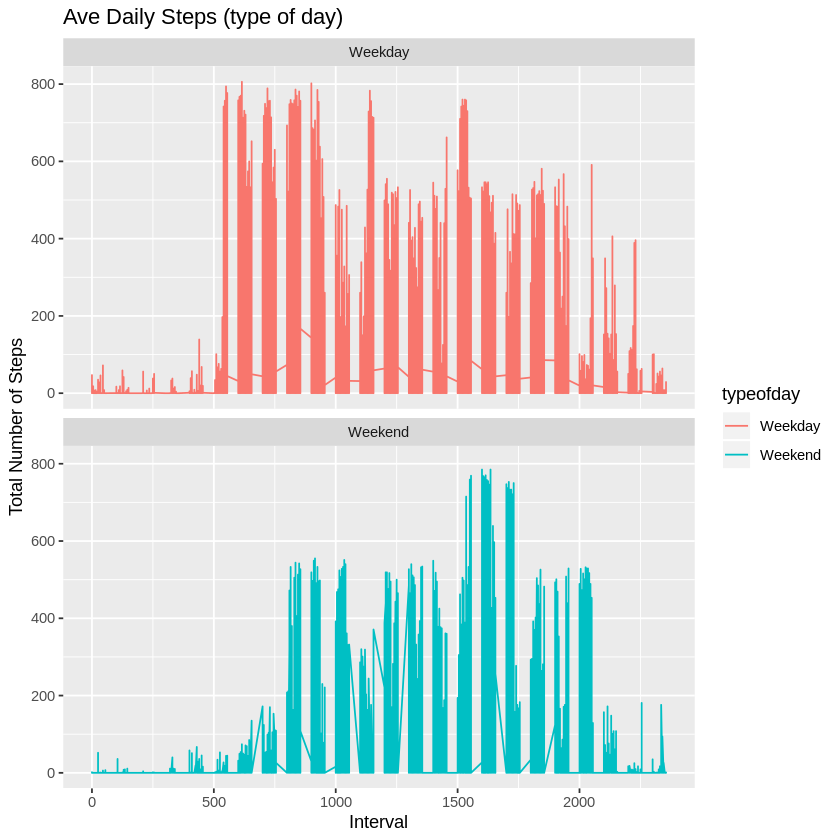

In [22]:
ggplot(activity2, aes(x =interval , y=steps, color=typeofday)) +
       geom_line() +
       labs(title = "Ave Daily Steps (type of day)", x = "Interval", y = "Total Number of Steps") +
       facet_wrap(~ typeofday, ncol = 1, nrow=2)


Calculate and report the mean and median total number of steps taken per day.


In [23]:
## mean of total steps per day
msteps <- mean(totalstepsperday$steps)
msteps

[1] 10766.19

In [24]:
## median of total steps per day
medsteps <- median(totalstepsperday$steps)
medsteps

[1] 10765

In [ ]:
## check work using summary
summary(totalstepsperday)

What is the average daily activity pattern?
Make a time series plot (i.e. type = “l”) of the 5-minute interval (x-axis) and the average number of steps taken, averaged across all days (y-axis)

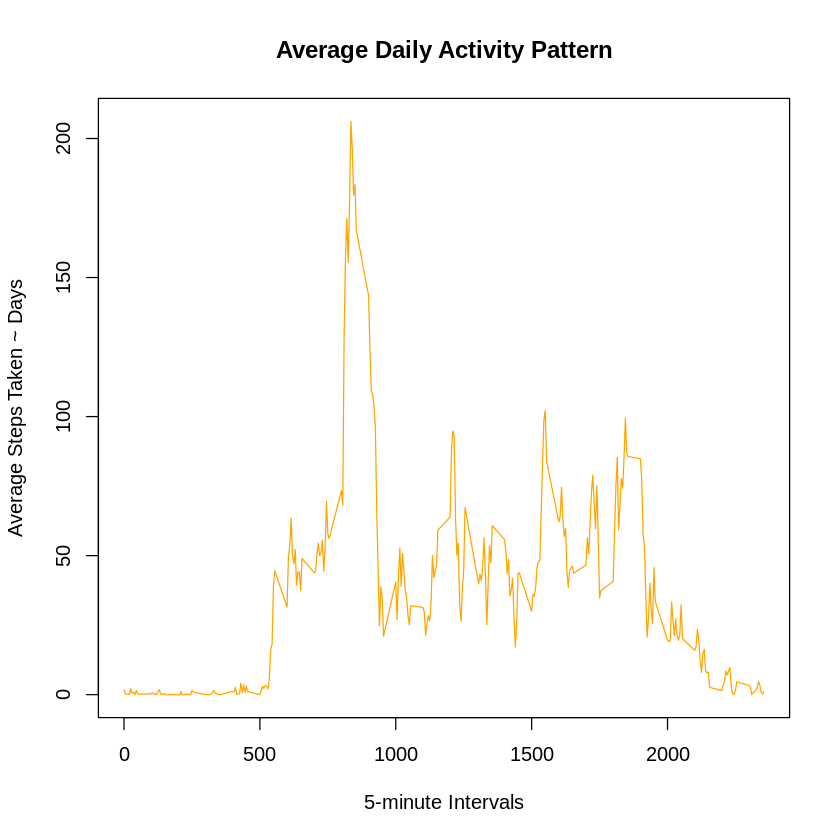

In [25]:
## five minute average using steps to interval - FUN = mean instead of sum
fivemin <- aggregate(steps ~ interval, data = activity, FUN = mean, na.rm = TRUE)
## line chart
plot(x = fivemin$interval, 
    y = fivemin$steps, 
    type = "l", 
    col = "orange",
    xlab = "5-minute Intervals",
    ylab = "Average Steps Taken ~ Days",
    main = "Average Daily Activity Pattern")

Which 5-minute interval, on average across all the days in the dataset, contains the maximum number of steps?

In [26]:
maxsteps <- fivemin$interval[which.max(fivemin$steps)]
maxsteps

[1] 835

Imputing missing values
Note that there are a number of days/intervals where there are missing values (coded as NA). The presence of missing days may introduce bias into some calculations or summaries of the data.

Calculate and report the total number of missing values in the dataset (i.e. the total number of rows with NAs)
Devise a strategy for filling in all of the missing values in the dataset. The strategy does not need to be sophisticated. For example, you could use the mean/median for that day, or the mean for that 5-minute interval, etc.

Replace NA values with the mean results for five minute intervals Create a new dataset that is equal to the original dataset but with the missing data filled in.


In [27]:
activity2 <- activity
nas <- is.na(activity2$steps)
avg_interval <- tapply(activity2$steps, activity2$interval, mean, na.rm=TRUE, simplify = TRUE)
activity2$steps[nas] <- avg_interval[as.character(activity2$interval[nas])]
names(activity2)

[1] "steps"    "date"     "interval"

In [28]:
## Check for no-NA
sum(is.na(activity2))

[1] 0

Make a histogram of the total number of steps taken each day and Calculate and report the mean and median total number of steps taken per day. Do these values differ from the estimates from the first part of the assignment? What is the impact of imputing missing data on the estimates of the total daily number of steps?


In [29]:
#Plotting
#Setting up the pannel for one row and two columns
par(mfrow=c(1,2))
## Similar analysis without NAs now
totalstepsperday2 <- aggregate(steps ~ date, data = activity2, FUN = sum, na.rm = TRUE)
head(totalstepsperday2)

,date,steps
,<date>,<dbl>
1,2012-10-01,10766.19
2,2012-10-02,126.00
3,2012-10-03,11352.00
4,2012-10-04,12116.00
5,2012-10-05,13294.00
6,2012-10-06,15420.00


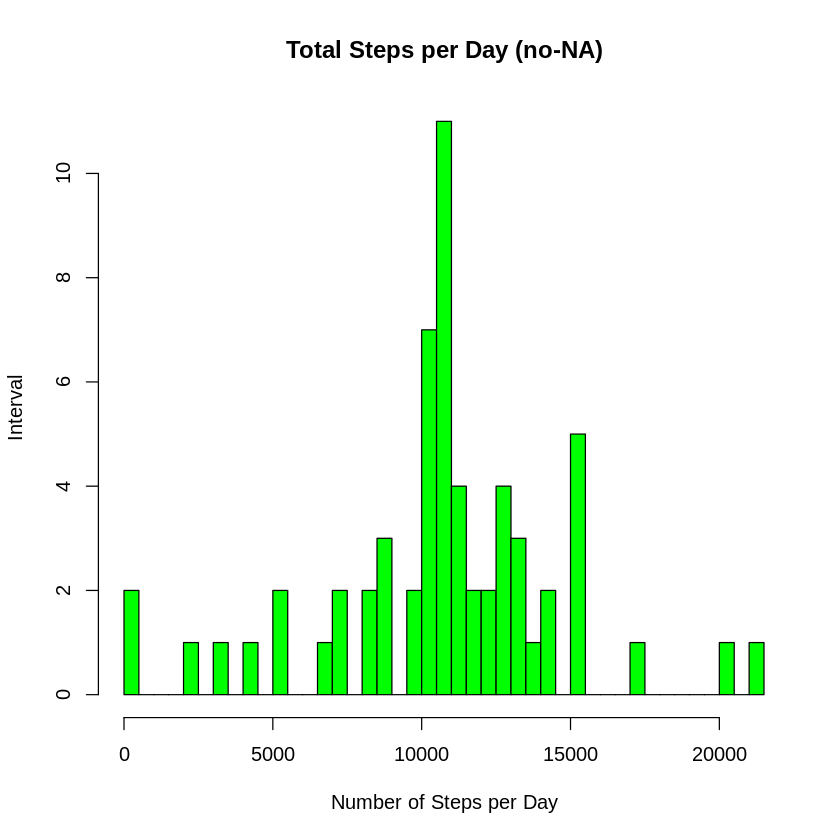

In [30]:
## Histogram without the NA values
hist(totalstepsperday2$steps, 
    main = "Total Steps per Day (no-NA)", 
    xlab = "Number of Steps per Day", 
    ylab = "Interval",
    col="green",
    breaks=50)

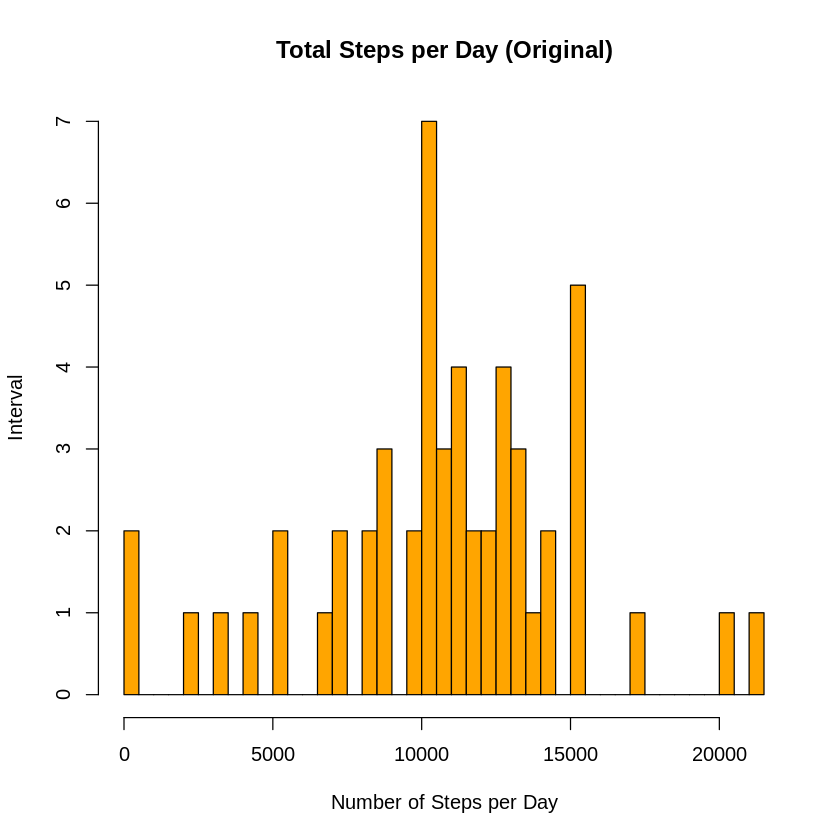

In [31]:
##Histogram with the orginal dataset
hist(totalstepsperday$steps, 
    main="Total Steps per Day (Original)", 
    xlab="Number of Steps per Day", 
    ylab = "Interval",
    col="orange",
    breaks=50)


In [32]:
#Resetting the panel
par(mfrow=c(1,1))
## What is the impact of imputing data?
summary(totalstepsperday)
summary(totalstepsperday2)

         date        steps      
 2012-10-02: 1   Min.   :   41  
 2012-10-03: 1   1st Qu.: 8841  
 2012-10-04: 1   Median :10765  
 2012-10-05: 1   Mean   :10766  
 2012-10-06: 1   3rd Qu.:13294  
 2012-10-07: 1   Max.   :21194  
 (Other)   :47                  

      date                steps      
 Min.   :2012-10-01   Min.   :   41  
 1st Qu.:2012-10-16   1st Qu.: 9819  
 Median :2012-10-31   Median :10766  
 Mean   :2012-10-31   Mean   :10766  
 3rd Qu.:2012-11-15   3rd Qu.:12811  
 Max.   :2012-11-30   Max.   :21194  

Are there differences in activity patterns between weekdays and weekends? For this part the weekdays() function may be of some help here. Use the dataset with the filled-in missing values for this part.

In [33]:
## Data has three fields, and we will add a new one in the next step
head(activity2)

,steps,date,interval
,<dbl>,<date>,<int>
1,1.7169811,2012-10-01,0
2,0.3396226,2012-10-01,5
3,0.1320755,2012-10-01,10
4,0.1509434,2012-10-01,15
5,0.0754717,2012-10-01,20
6,2.0943396,2012-10-01,25


Create a new factor variable in the dataset with two levels - “weekday” and “weekend” indicating whether a given date is a weekday or weekend day.


In [34]:
## Add the new weekend/weekday field
activity2<- activity2%>%
        mutate(typeofday= ifelse(weekdays(activity2$date)=="Saturday" | weekdays(activity2$date)=="Sunday", "Weekend", "Weekday"))
head(activity2)

,steps,date,interval,typeofday
,<dbl>,<date>,<int>,<chr>
1,1.7169811,2012-10-01,0,Weekday
2,0.3396226,2012-10-01,5,Weekday
3,0.1320755,2012-10-01,10,Weekday
4,0.1509434,2012-10-01,15,Weekday
5,0.0754717,2012-10-01,20,Weekday
6,2.0943396,2012-10-01,25,Weekday


Make a panel plot containing a time series plot (i.e. type = “l”) of the 5-minute interval (x-axis) and the average number of steps taken, averaged across all weekday days or weekend days (y-axis).


,interval,steps
,<int>,<dbl>
1,0,1.7169811
2,5,0.3396226
3,10,0.1320755
4,15,0.1509434
5,20,0.0754717
6,25,2.0943396


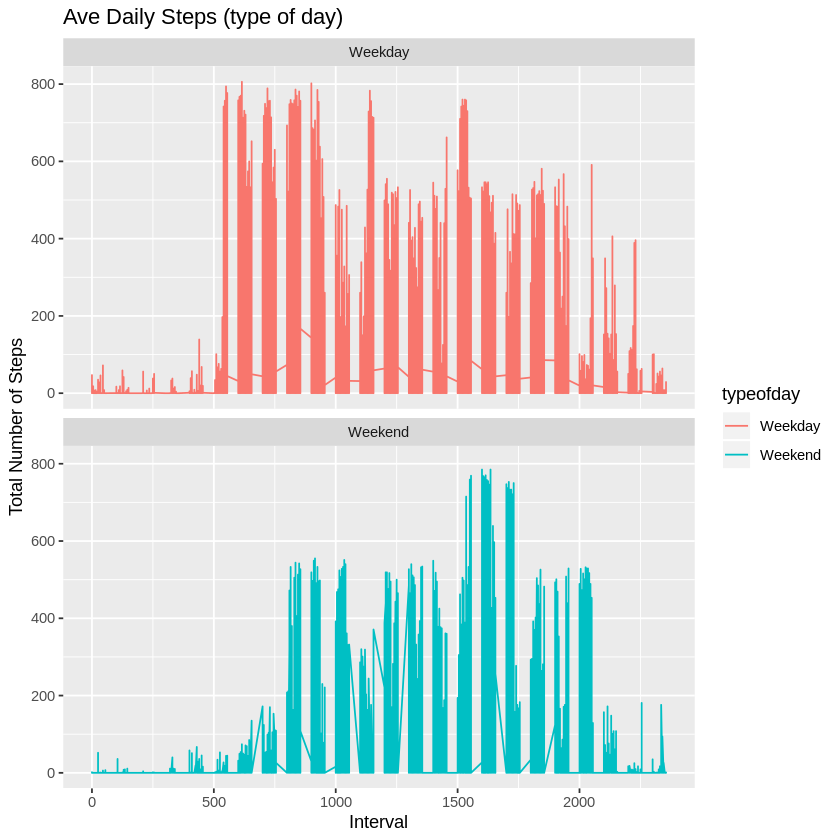

In [35]:
## Plot - Line chart
fivemin2<- aggregate(steps ~ interval, data = activity2, FUN = mean, na.rm = TRUE)
head(fivemin2)

ggplot(activity2, aes(x =interval , y=steps, color=typeofday)) +
       geom_line() +
       labs(title = "Ave Daily Steps (type of day)", x = "Interval", y = "Total Number of Steps") +
       facet_wrap(~ typeofday, ncol = 1, nrow=2)
 